In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

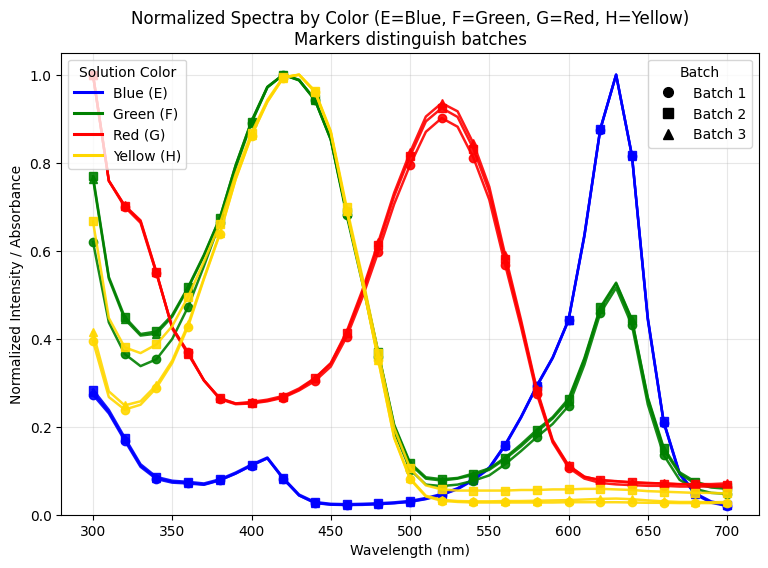

In [3]:
# Load data
df = pd.read_csv('Fractions_August19_2025.csv')

# Configs from your instruction
solution_colors = {
    "E": "blue",   # Blue
    "F": "green",  # Green
    "G": "red",    # Red
    "H": "gold"    # Yellow
}
# Batches in the file: 1 (Batch 1), 3 (Batch 2), 5 (Batch 3 per your latest note)
batch_cols = ["1", "3", "5"]
batch_labels = {"1": "Batch 1", "3": "Batch 2", "5": "Batch 3"}
batch_markers = {"1": "o", "3": "s", "5": "^"}

# Normalize helper (per-curve max)
def normalize_series(s: pd.Series) -> pd.Series:
    m = s.max()
    if pd.isna(m) or m == 0:
        return s * 0
    return s / m

w = df["Wavelength"]

plt.figure(figsize=(9, 6))

# Plot all four color families on the same axes
for base in ["E", "F", "G", "H"]:
    for b in batch_cols:
        col = f"{base}{b}"
        if col in df.columns:
            y = normalize_series(df[col])
            plt.plot(
                w, y,
                color=solution_colors[base],
                marker=batch_markers[b],
                markevery=max(len(w)//18, 1),  # sprinkle markers, not every point
                linewidth=1.8,
                alpha=0.9
            )

plt.title("Normalized Spectra by Color (E=Blue, F=Green, G=Red, H=Yellow)\nMarkers distinguish batches")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Intensity / Absorbance")
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)

# Build two clean legends: one for colors, one for batches
color_handles = [
    Line2D([0], [0], color=solution_colors[c], lw=2.2, label={"E":"Blue (E)", "F":"Green (F)", "G":"Red (G)", "H":"Yellow (H)"}[c])
    for c in ["E", "F", "G", "H"]
]
batch_handles = [
    Line2D([0], [0], color="black", marker=batch_markers[b], linestyle="None", label=batch_labels[b], markersize=7)
    for b in batch_cols
]

leg1 = plt.legend(handles=color_handles, loc="upper left", title="Solution Color")
plt.gca().add_artist(leg1)
plt.legend(handles=batch_handles, loc="upper right", title="Batch")
plt.show()



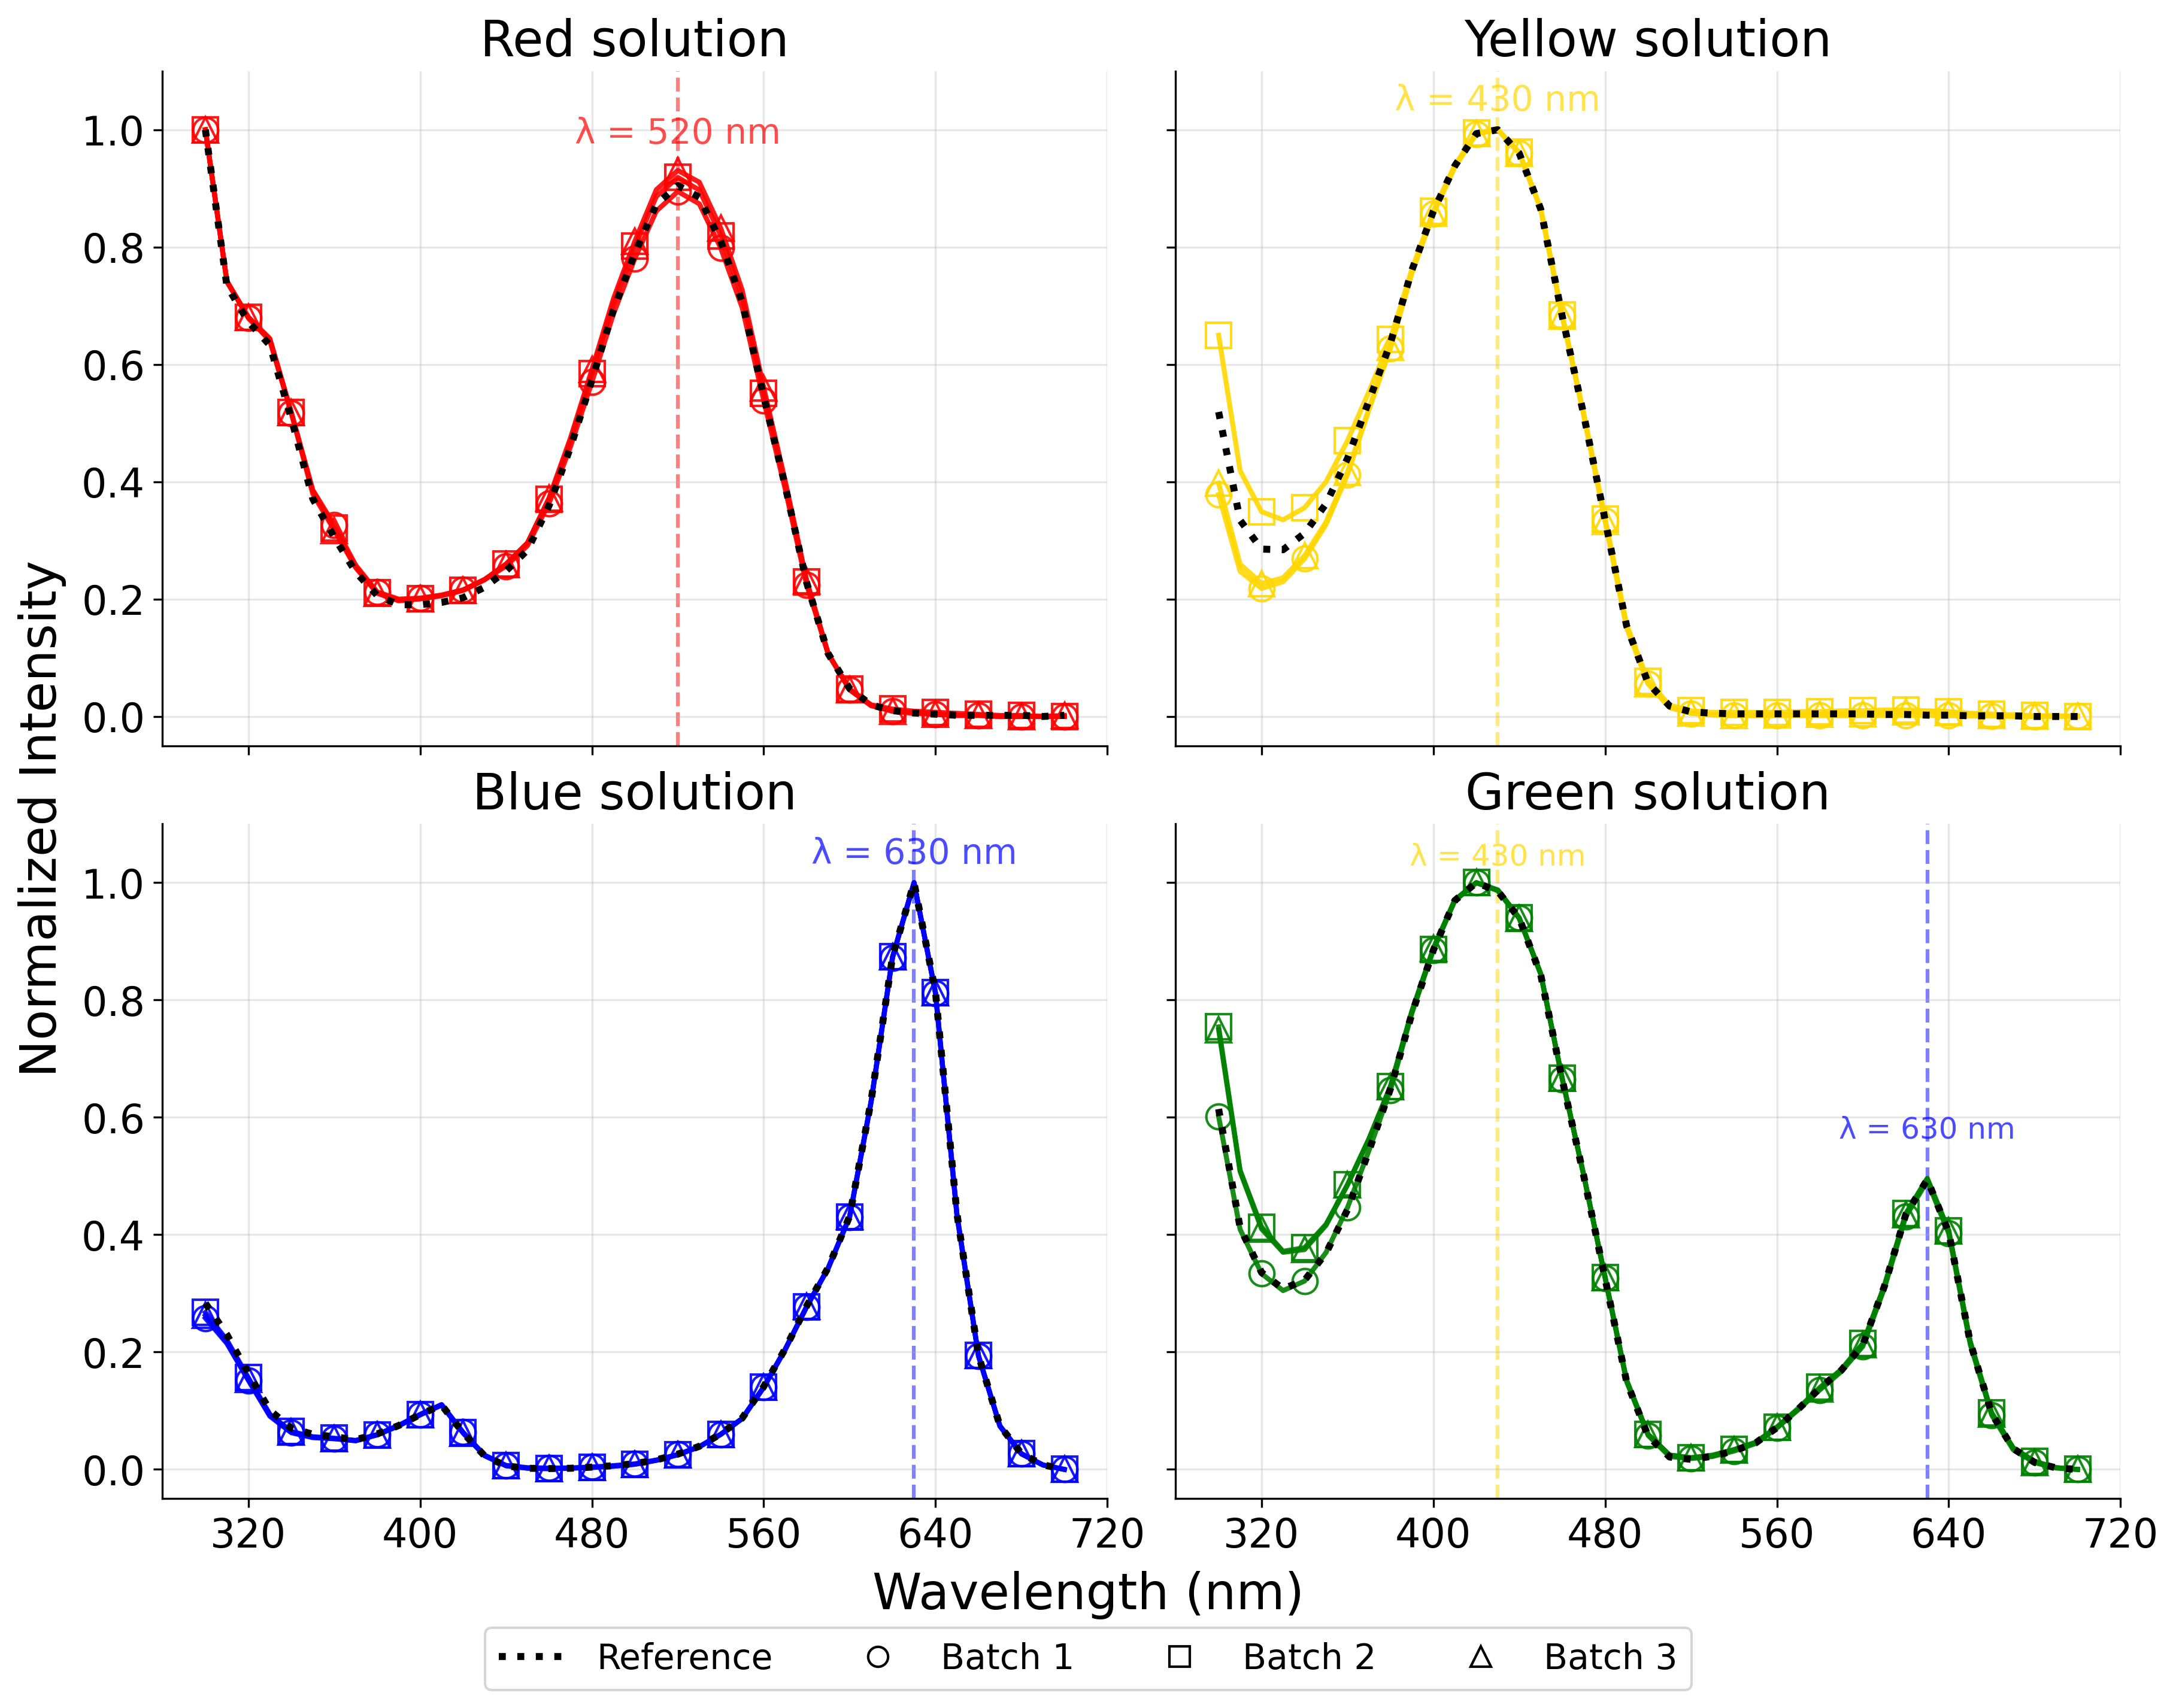

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

# Load
df = pd.read_csv("Fractions_August19_2025.csv")
w = df["Wavelength"].values

solution_colors = {"E": "blue", "F": "green", "G": "red", "H": "gold"}
panel_titles = {"E": "Blue", "F": "Green", "G": "Red", "H": "Yellow"}
batch_cols = ["1","3","5"]
batch_labels = {"1":"Batch 1","3":"Batch 2","5":"Batch 3"}
batch_markers = {"1":"o","3":"s","5":"^"}
ref_suffix = "12"

def minmax_normalize(y):
    y = np.asarray(y, float)
    r = y.max() - y.min()
    return (y - y.min())/r if r != 0 else np.zeros_like(y)

def find_peak_xy(wl, y, lo=350, hi=700):
    m = (wl>=lo) & (wl<=hi)
    if not np.any(m): return None
    i = np.nanargmax(y[m])
    return float(wl[m][i]), float(y[m][i])

fig, axes = plt.subplots(2,2, figsize=(12,9), sharex=True, sharey=True, constrained_layout=True, dpi = 300)
axes = axes.flatten()
mark_every = max(len(w)//20, 1)

for i, base in enumerate(["G","H","E","F"]):
    ax = axes[i]

    # Reference
    ref_col = f"{base}{ref_suffix}"
    if ref_col in df.columns:
        y_ref = minmax_normalize(df[ref_col].values)
        ax.plot(w, y_ref, color="black", linestyle=":", linewidth=2.8,
                label="Reference", zorder=3)

        if base == "F":  # Green panel: show yellow@420 and blue@630
            # (target_nm, color_key)
            for target, ckey in [(430, "H"), (630, "E")]:
                idx = (np.abs(w - target)).argmin()
                px, py = w[idx], y_ref[idx]
                ax.axvline(px, color=solution_colors[ckey],
                        linewidth=1.5, linestyle="--", zorder=1, alpha=0.5)
                ax.text(px, min(py + 0.06, 1.02), f"λ = {int(round(px))} nm",
                        ha="center", va="bottom", fontsize=12,
                        color=solution_colors[ckey], alpha=0.7)
        else:
            # Other panels: line + label in the panel's own color
            pk = find_peak_xy(w, y_ref, lo=340, hi=720)
            if pk:
                px, py = pk
                ax.axvline(px, color=solution_colors[base],
                        linewidth=1.5, linestyle="--", zorder=1, alpha=0.5)
                ax.text(px, min(py + 0.06, 1.02), f"λ = {int(round(px))} nm",
                        ha="center", va="bottom", fontsize=14,
                        color=solution_colors[base], alpha=0.7)

    # Batches
    for b in batch_cols:
        col = f"{base}{b}"
        if col in df.columns:
            y = minmax_normalize(df[col].values)
            ax.plot(
                w, y,
                color=solution_colors[base],        # line color
                marker=batch_markers[b],
                markevery=mark_every,
                linewidth=2.0,
                alpha=0.9,
                label=batch_labels[b],
                zorder=2,
                markerfacecolor='none',             # <-- hollow markers
                markeredgecolor=solution_colors[base],
                markersize=10
            )


    ax.set_title(f"{panel_titles[base]} solution", fontsize=20, pad=6)
    ax.grid(alpha=0.3)
    ax.set_ylim(-0.05, 1.1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6, integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(labelsize=16)

fig.supxlabel("Wavelength (nm)", fontsize=20)
fig.supylabel("Normalized Intensity", fontsize=20)

handles = [Line2D([0],[0], color="black", linestyle=":", lw=2.8, label="Reference")] + [
    Line2D([0],[0],
           color="black",
           marker=batch_markers[b],
           linestyle="None",
           lw=2,
           label=batch_labels[b],
           markerfacecolor='none',
           markeredgecolor="black",
           markersize=8)
    for b in batch_cols
]

fig.legend(handles=handles, loc="lower center", ncol=4,
           fontsize=14, bbox_to_anchor=(0.5, -0.05))

plt.show()
